# Armin Abbasi Najarzadeh - Assignment B-1


proof-of-work: https://github.com/R-m1n/SBU/tree/main/Machine%20Learning

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Importing Custom Modules

In [2]:
from armain import Scaler, DataLoader, RidgeRegression, BatchRegression, StochasticRegression

# Reading & Preprocessing Dataset

In [3]:
data = pd.read_csv("Dummy-Data-HSS.csv")
data.drop(columns=["Influencer"], inplace=True)
data.fillna(0, inplace=True)

data.head(10)

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
5,29.0,9.614382,1.027163,105.889148
6,55.0,24.893811,4.273602,198.679825
7,31.0,17.355042,2.289855,108.733932
8,76.0,24.648898,7.130116,270.189400
9,13.0,0.431128,2.229423,48.280582


### Defining a Scaler Object

In [4]:
scaler = Scaler()

scaler.standardize(data, exclude=["Sales"])

# Training & Evaluating Models

### Setting Hyperparameters

In [5]:
target_label = "Sales"
data_split = 0.8

learning_methods = ["CF", "GD-r", "GD-l", "SGD-r", "SGD-l"]
lambdas = [0.01, 0.1, 1, 10]

epoch = 3
learning_rate = 0.0001

### Loading Data an DataLoader

- Splitting Data into two Training and Validation Subsets
- Vectorizing Inputs (Features) and Output (Ground Truth)

In [6]:
data_loader = DataLoader(data,
                           target_label=target_label,
                           split=data_split)

data_loader.head(10)

,TV,Radio,Social Media,Sales
0,-1.447401,-1.195158,-0.185872,54.732757
1,-1.561825,-0.919390,-0.410942,46.677897
2,-0.493874,-0.233083,-0.183421,150.177829
3,1.108052,1.225849,1.626880,298.246340
4,-1.485542,-1.002007,-0.864125,56.594181
5,-0.951567,-0.880514,-1.035196,105.889148
6,0.040102,0.696698,0.430803,198.679825
7,-0.875285,-0.081488,-0.465001,108.733932
8,0.841065,0.671417,1.720722,270.189400
9,-1.561825,-1.828452,-0.492290,48.280582


### Training Models

In [7]:
rmsd_values = {method: [] for method in learning_methods}

for scale in lambdas:
    cf = RidgeRegression(lambda_=scale)
    gd_r = BatchRegression()
    gd_l = BatchRegression()
    sgd_r = StochasticRegression()
    sgd_l = StochasticRegression()

    _, cf_val_rmsd = cf.train(data_loader)

    _, gd_r_val_rmsd = gd_r.train(data_loader, epoch=epoch, learning_rate=learning_rate, ridge=scale)

    _, gd_l_val_rmsd = gd_l.train(data_loader, epoch=epoch, learning_rate=learning_rate, lasso=scale)

    _, sgd_r_val_rmsd = sgd_r.train(data_loader, epoch=epoch, learning_rate=learning_rate, ridge=scale)
    
    _, sgd_l_val_rmsd = sgd_l.train(data_loader, epoch=epoch, learning_rate=learning_rate, lasso=scale)

    rmsd_values["CF"].append(cf_val_rmsd.sum())

    rmsd_values["GD-r"].append(sum(gd_r_val_rmsd))

    rmsd_values["GD-l"].append(sum(gd_l_val_rmsd))

    rmsd_values["SGD-r"].append(sum(sgd_r_val_rmsd))

    rmsd_values["SGD-l"].append(sum(sgd_l_val_rmsd))


### Visualizing RMSD of each Learning Method with Respect to Different Regularization Hyperparameters

#### Drawing Table

In [8]:
table = pd.DataFrame(rmsd_values, index=lambdas).T

table

,0.01,0.10,1.00,10.00
CF,136.083883,136.084004,136.085212,136.097067
GD-r,190.400703,190.925797,208.091329,2778.431866
GD-l,190.379737,190.375916,190.350961,191.426006
SGD-r,221.199688,222.383033,236.604437,273.316539
SGD-l,221.082183,221.098376,221.268325,223.762424


#### Drawing Heatmap

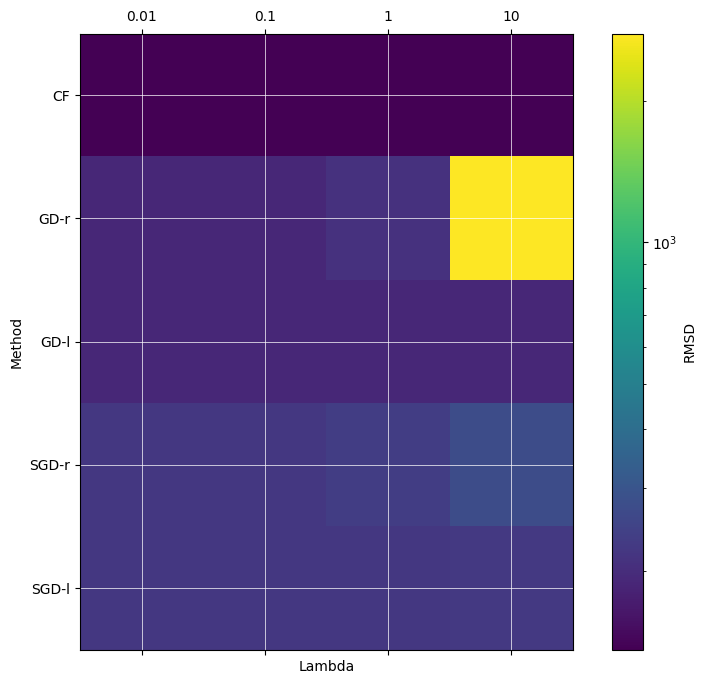

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(table, cmap='viridis', norm=colors.LogNorm())

ax.grid(True, which='both', color='white', linewidth=0.5)

fig.colorbar(cax, label='RMSD')

plt.xticks(np.arange(len(lambdas)), lambdas)
plt.yticks(np.arange(len(learning_methods)), learning_methods)

plt.xlabel('Lambda')
plt.ylabel('Method')

plt.show()

#### Plotting 

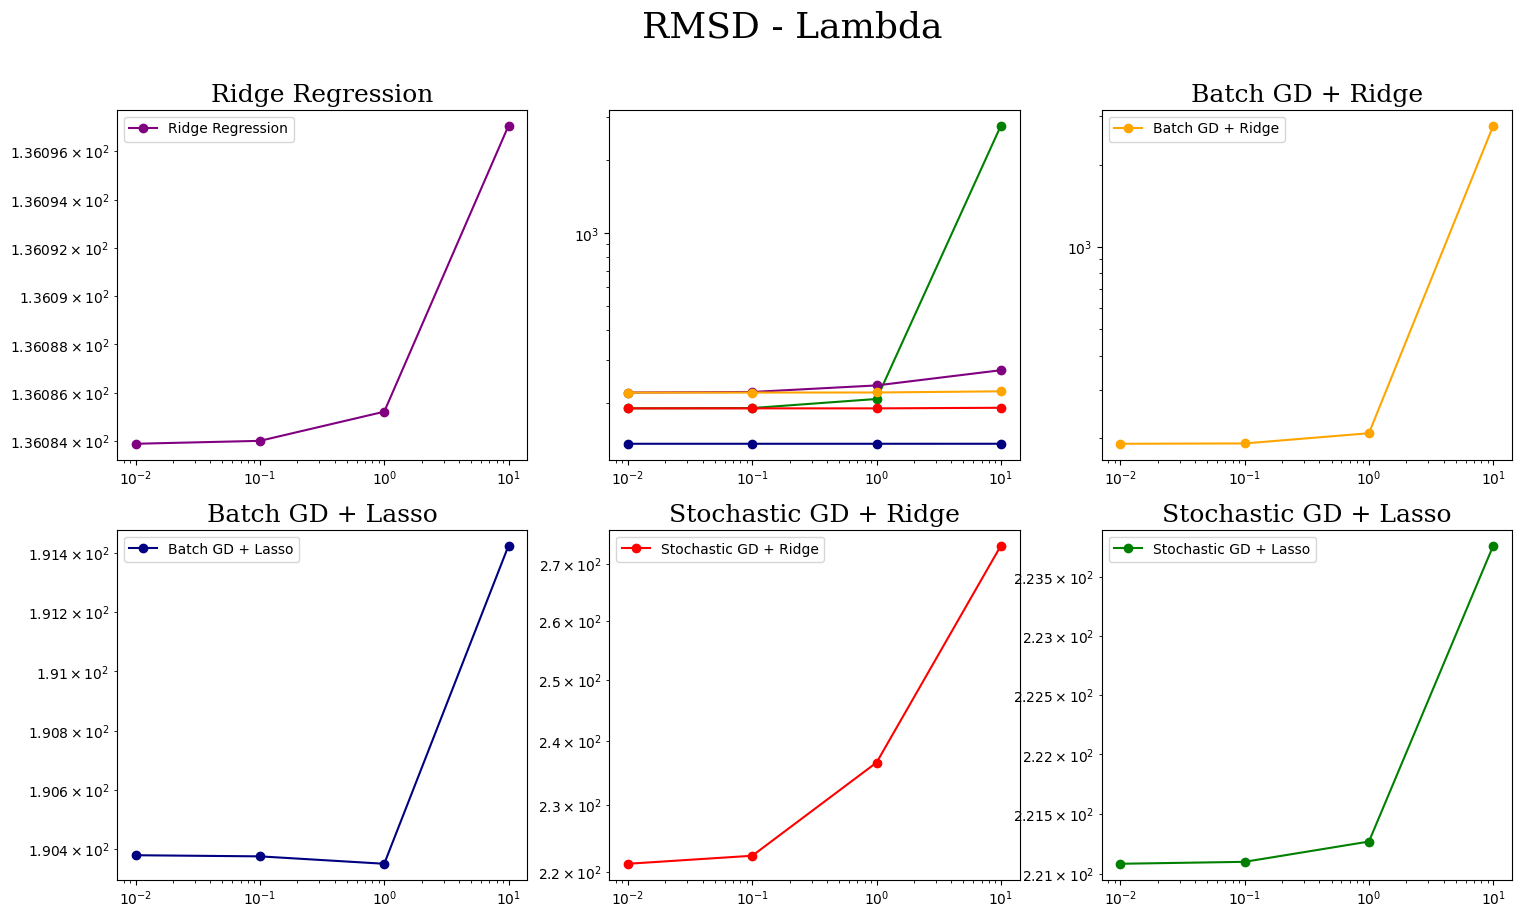

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs = axs.flatten()

axs[0].plot(lambdas, rmsd_values["CF"], color="purple", label="Ridge Regression", marker="o")
axs[0].set_title("Ridge Regression", size=18, family="serif")
axs[0].legend(loc = "upper left")

axs[1].plot(lambdas, rmsd_values["CF"], color="navy", label="Ridge Regression", marker="o")
axs[1].plot(lambdas, rmsd_values["GD-r"], color="green", label="Batch GD + Ridge", marker="o")
axs[1].plot(lambdas, rmsd_values["GD-l"], color="red", label="Batch GD + Lasso", marker="o")
axs[1].plot(lambdas, rmsd_values["SGD-r"], color="purple", label="Stochastic GD + Ridge", marker="o")
axs[1].plot(lambdas, rmsd_values["SGD-l"], color="orange", label="Stochastic GD + Lasso", marker="o")

axs[2].plot(lambdas, rmsd_values["GD-r"], color="orange", label="Batch GD + Ridge", marker="o")
axs[2].set_title("Batch GD + Ridge", size=18, family="serif")
axs[2].legend(loc = "upper left")

axs[3].plot(lambdas, rmsd_values["GD-l"], color="navy", label="Batch GD + Lasso", marker="o")
axs[3].set_title("Batch GD + Lasso", size=18, family="serif")
axs[3].legend(loc = "upper left")

axs[4].plot(lambdas, rmsd_values["SGD-r"], color="red", label="Stochastic GD + Ridge", marker="o")
axs[4].set_title("Stochastic GD + Ridge", size=18, family="serif")
axs[4].legend(loc = "upper left")

axs[5].plot(lambdas, rmsd_values["SGD-l"], color="green", label="Stochastic GD + Lasso", marker="o")
axs[5].set_title("Stochastic GD + Lasso", size=18, family="serif")
axs[5].legend(loc = "upper left")

for ax in axs:
    ax.set_xscale("log")
    ax.set_yscale("log")
    
fig.suptitle("RMSD - Lambda", size=26, family="serif")


plt.show()